In [136]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library 
import requests
# Import the API key
from config import weather_api_key

In [137]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [138]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [139]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [140]:
from citipy import citipy

In [141]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    
    print(coordinate[0], coordinate[1])

-16.747139162047887 -15.396468969266891
-61.56361164767421 105.70328321019491
2.457022915140314 101.18192477545472
82.35720843921291 -3.9341029402518473
80.69431258613304 44.82390782984439
87.23022024657965 14.309507466015532
83.02572353927016 -5.654940358938745
-3.5742611355385208 -103.45691552544696
-45.001293115364966 34.24753968685965
-66.81115660528896 -47.60157639830277
-30.609011510833994 -131.86104971779713
68.43442994555633 -69.25298657292261
-54.06499136049037 27.903264456405708
-33.039510738521074 -48.899668076924854
31.14461817451341 -160.07772692477272
11.551464504649076 135.65595656532798
-74.40214854960227 126.55984380855176
-62.10205139326443 78.08329967515095
-58.25627041215344 -160.6856429166776
25.849147779316098 97.20267470141124
36.551745148555625 -158.60192049270938
10.967865399791947 113.6751232094013
-79.06096962083518 -82.09027302845934
17.95616607367232 170.5184967722089
86.94785029606521 20.415474935852586
28.975837381725157 100.60532890826732
-29.26324838980

In [142]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [143]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

georgetown sh
albany au
tanjong sepat my
barentsburg sj
belushya guba ru
longyearbyen sj
barentsburg sj
puerto ayora ec
east london za
ushuaia ar
rikitea pf
clyde river ca
port elizabeth za
cidreira br
kapaa us
airai pw
new norfolk au
souillac mu
mataura pf
myitkyina mm
kapaa us
taburi ph
ushuaia ar
butaritari ki
longyearbyen sj
xichang cn
roma au
ignacio zaragoza mx
bluff nz
isangel vu
punta arenas cl
busselton au
shubarshi kz
ola ru
los llanos de aridane es
ushuaia ar
barentsburg sj
grand river south east mu
hermanus za
ushuaia ar
busselton au
kapaa us
chany ru
bubaque gw
elko us
kapaa us
avarua ck
samana do
victoria sc
victoria sc
cherskiy ru
coihaique cl
hilo us
ushuaia ar
yellowknife ca
chapais ca
ponta do sol cv
bredasdorp za
kruisfontein za
cheuskiny ru
biak id
coihaique cl
shanghai cn
bredasdorp za
mount isa au
burnie au
ushuaia ar
viedma ar
kruisfontein za
svetlogorsk ru
sur om
caravelas br
sassandra ci
nyzhni sirohozy ua
inta ru
atuona pf
skalistyy ru
santa helena de goias br

saint-philippe re
ushuaia ar
ushuaia ar
lebu cl
hilo us
lebu cl
chokurdakh ru
barabai id
thompson ca
hasaki jp
illoqqortoormiut gl
lebu cl
rikitea pf
bantogon ph
chokurdakh ru
georgetown sh
ponta do sol cv
ushuaia ar
hermanus za
hithadhoo mv
katsuura jp
saleaula ws
cockburn town tc
chuy uy
qaanaaq gl
dikson ru
kodiak us
kaeo nz
sattahip th
west bay ky
placerville us
aksu cn
upernavik gl
kapaa us
medicine hat ca
illoqqortoormiut gl
tessalit ml
ushuaia ar
dudinka ru
port alfred za
pochutla mx
rikitea pf
georgetown sh
barrow us
kodiak us
jalu ly
castro cl
taolanaro mg
okha ru
mairang in
boli cn
kinkala cg
abalak ne
jamestown sh
puerto ayora ec
hermanus za
kapaa us
mogadishu so
talawdi sd
tsihombe mg
torbay ca
narrabri au
rikitea pf
vaini to
jamestown sh
puerto ayora ec
vurnary ru
okhotsk ru
waterfoot gb
hasaki jp
hithadhoo mv
upernavik gl
hobart au
puerto ayora ec
lebu cl
pogranichnyy ru
agadez ne
neiafu to
rikitea pf
brae gb
kidal ml
raudeberg no
alta floresta br
pevek ru
hermanus za
atu

In [144]:
# Impot the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [145]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | georgetown
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | tanjong sepat
City not found. Skipping...
Processing Record 4 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 5 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 6 of Set 1 | longyearbyen
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | east london
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | clyde river
Processing Record 12 of Set 1 | port elizabeth
Processing Record 13 of Set 1 | cidreira
Processing Record 14 of Set 1 | kapaa
Processing Record 15 of Set 1 | airai
Processing Record 16 of Set 1 | new norfolk
Processing Record 17 of Set 1 | souillac
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | myitkyina
Processing Record 20 of Set 1 | taburi
City not found. Ski

Processing Record 37 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 38 of Set 4 | sakakah
Processing Record 39 of Set 4 | round rock
Processing Record 40 of Set 4 | saint-joseph
Processing Record 41 of Set 4 | nara
Processing Record 42 of Set 4 | bilma
Processing Record 43 of Set 4 | beidao
Processing Record 44 of Set 4 | el jicaro
Processing Record 45 of Set 4 | yoichi
Processing Record 46 of Set 4 | acapulco
Processing Record 47 of Set 4 | oum hadjer
Processing Record 48 of Set 4 | port keats
Processing Record 49 of Set 4 | kuryk
Processing Record 50 of Set 4 | mpika
Processing Record 1 of Set 5 | gizo
Processing Record 2 of Set 5 | sept-iles
Processing Record 3 of Set 5 | agropoli
Processing Record 4 of Set 5 | sitka
Processing Record 5 of Set 5 | itarema
Processing Record 6 of Set 5 | gaoual
Processing Record 7 of Set 5 | inuvik
Processing Record 8 of Set 5 | kasongo-lunda
Processing Record 9 of Set 5 | daru
Processing Record 10 of Set 5 | piet retief
Pro

Processing Record 30 of Set 8 | mecca
Processing Record 31 of Set 8 | carinhanha
Processing Record 32 of Set 8 | novoagansk
Processing Record 33 of Set 8 | gisborne
Processing Record 34 of Set 8 | jining
Processing Record 35 of Set 8 | lavrentiya
Processing Record 36 of Set 8 | opuwo
Processing Record 37 of Set 8 | ust-kuyga
Processing Record 38 of Set 8 | whitehorse
Processing Record 39 of Set 8 | ossora
Processing Record 40 of Set 8 | vao
Processing Record 41 of Set 8 | kudat
Processing Record 42 of Set 8 | emerald
Processing Record 43 of Set 8 | dunedin
Processing Record 44 of Set 8 | maxixe
Processing Record 45 of Set 8 | bushehr
Processing Record 46 of Set 8 | vestmannaeyjar
Processing Record 47 of Set 8 | erdemli
Processing Record 48 of Set 8 | yeppoon
Processing Record 49 of Set 8 | ruatoria
City not found. Skipping...
Processing Record 50 of Set 8 | lichtenau
Processing Record 1 of Set 9 | cody
Processing Record 2 of Set 9 | west wendover
Processing Record 3 of Set 9 | anito
Pr

Processing Record 21 of Set 12 | nizhneangarsk
Processing Record 22 of Set 12 | sumbe
Processing Record 23 of Set 12 | haines junction
Processing Record 24 of Set 12 | sasebo
Processing Record 25 of Set 12 | altay
Processing Record 26 of Set 12 | villa vazquez
City not found. Skipping...
Processing Record 27 of Set 12 | chiapa
Processing Record 28 of Set 12 | chiang rai
Processing Record 29 of Set 12 | axim
Processing Record 30 of Set 12 | takoradi
Processing Record 31 of Set 12 | noumea
Processing Record 32 of Set 12 | griffith
Processing Record 33 of Set 12 | babanusah
City not found. Skipping...
Processing Record 34 of Set 12 | port blair
Processing Record 35 of Set 12 | kenai
Processing Record 36 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 37 of Set 12 | bac lieu
Processing Record 38 of Set 12 | pemangkat
Processing Record 39 of Set 12 | boyle
Processing Record 40 of Set 12 | dwarka
Processing Record 41 of Set 12 | powassan
Processing Record 42 of Set 12

In [146]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Georgetown,5.4112,100.3354,78.89,92,20,3.44,MY,2022-10-02 22:50:12
1,Albany,42.6001,-73.9662,52.88,65,100,8.50,US,2022-10-02 22:50:41
2,Longyearbyen,78.2186,15.6401,37.24,93,75,3.44,SJ,2022-10-02 22:55:07
3,Puerto Ayora,-0.7393,-90.3518,73.36,91,85,4.00,EC,2022-10-02 22:55:07
4,East London,-33.0153,27.9116,66.85,93,23,10.38,ZA,2022-10-02 22:55:08
5,Ushuaia,-54.8000,-68.3000,46.06,53,0,4.61,AR,2022-10-02 22:51:31
6,Rikitea,-23.1203,-134.9692,74.82,63,8,3.83,PF,2022-10-02 22:54:25
7,Clyde River,70.4692,-68.5914,30.43,74,100,4.61,CA,2022-10-02 22:55:08
8,Port Elizabeth,-33.9180,25.5701,64.31,94,40,16.11,ZA,2022-10-02 22:50:44
9,Cidreira,-30.1811,-50.2056,61.48,88,49,7.49,BR,2022-10-02 22:55:09


In [147]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [148]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

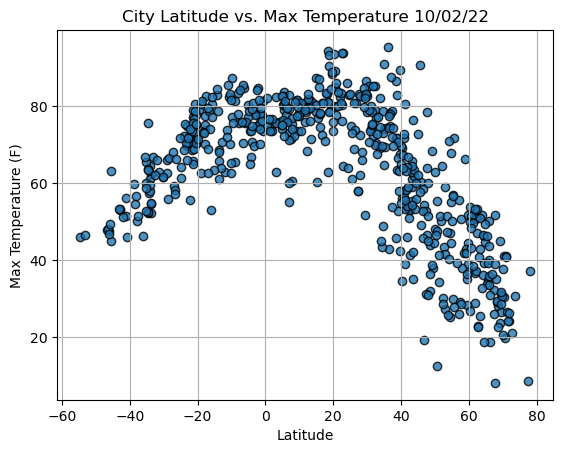

In [149]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

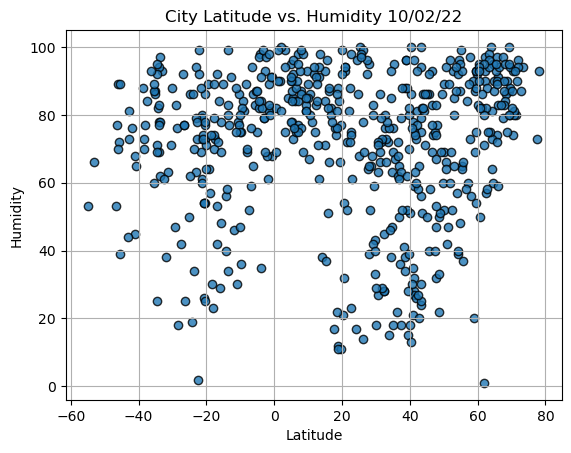

In [150]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

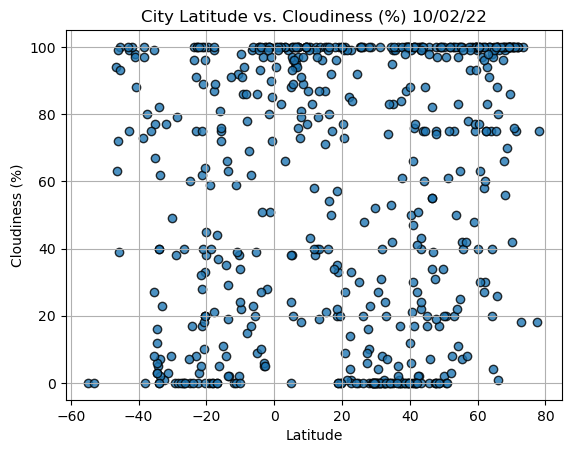

In [151]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

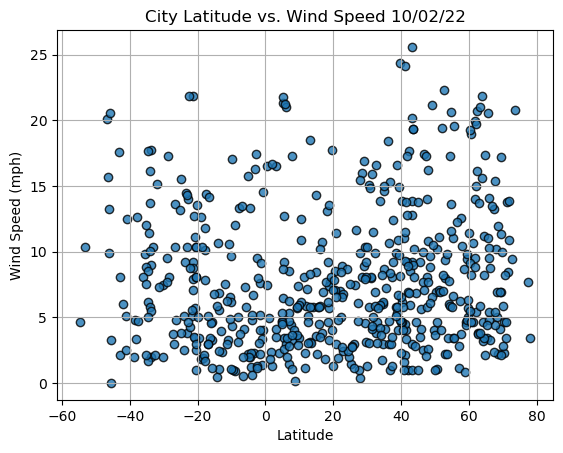

In [152]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [153]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
   
# Import linregress
    from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [154]:
index13 = city_data_df.loc[13]
index13

City                     Souillac
Lat                      -20.5167
Lng                       57.5167
Max Temp                    70.18
Humidity                       73
Cloudiness                     20
Wind Speed                  10.36
Country                        MU
Date          2022-10-02 22:55:11
Name: 13, dtype: object

In [155]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4      False
       ...  
567    False
568     True
569     True
570    False
571     True
Name: Lat, Length: 572, dtype: bool

In [156]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Georgetown,5.4112,100.3354,78.89,92,20,3.44,MY,2022-10-02 22:50:12
1,Albany,42.6001,-73.9662,52.88,65,100,8.50,US,2022-10-02 22:50:41
2,Longyearbyen,78.2186,15.6401,37.24,93,75,3.44,SJ,2022-10-02 22:55:07
7,Clyde River,70.4692,-68.5914,30.43,74,100,4.61,CA,2022-10-02 22:55:08
10,Kapaa,22.0752,-159.3190,82.18,81,85,7.00,US,2022-10-02 22:55:09


In [157]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

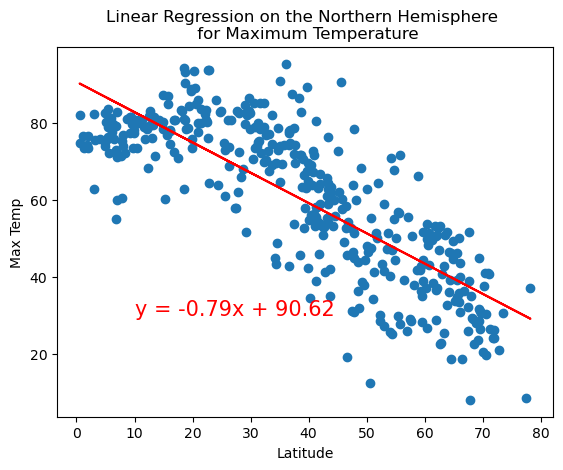

In [158]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n for Maximum Temperature", "Max Temp",(10,30))

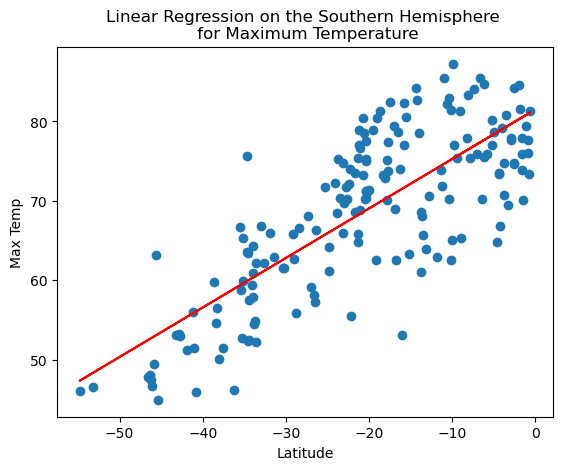

In [163]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-30,40))

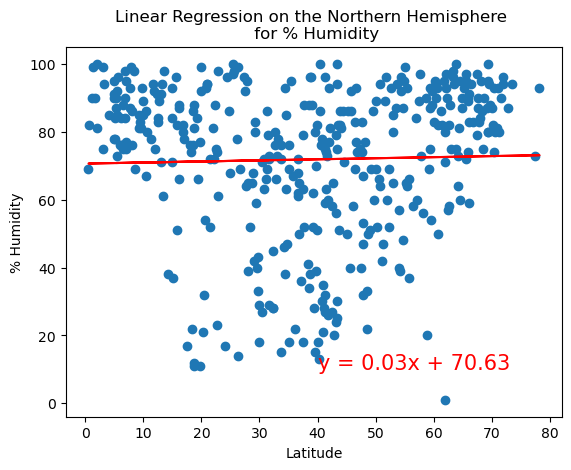

In [174]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

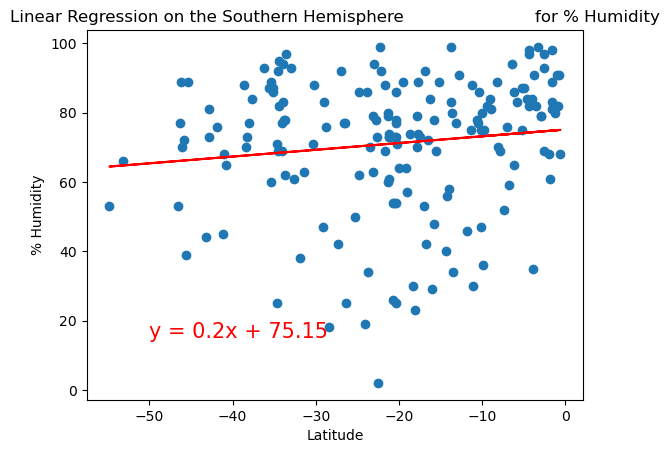

In [161]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

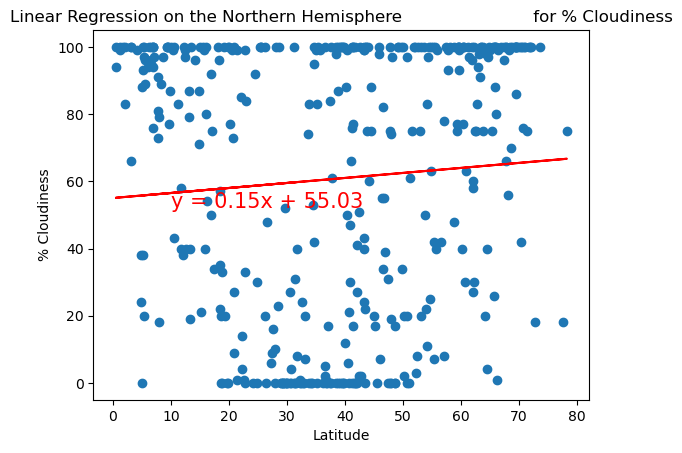

In [175]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,52))

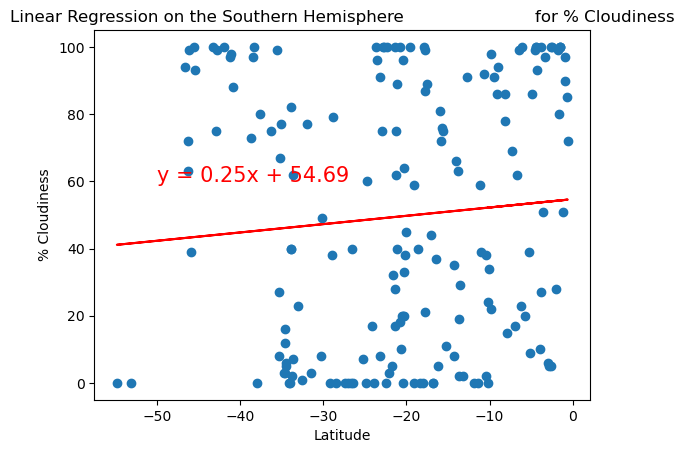

In [164]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

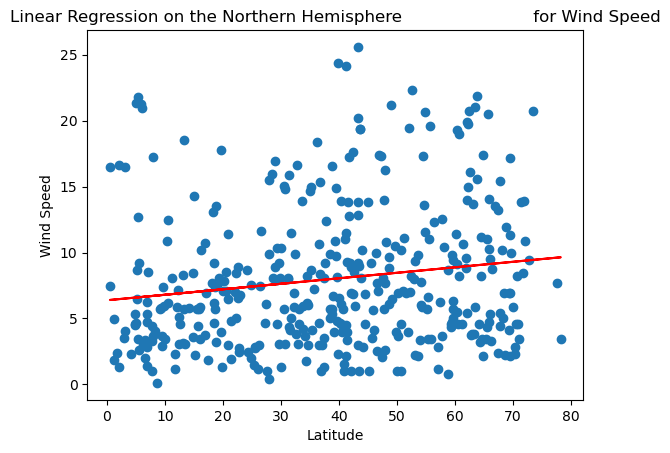

In [183]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(10,60))

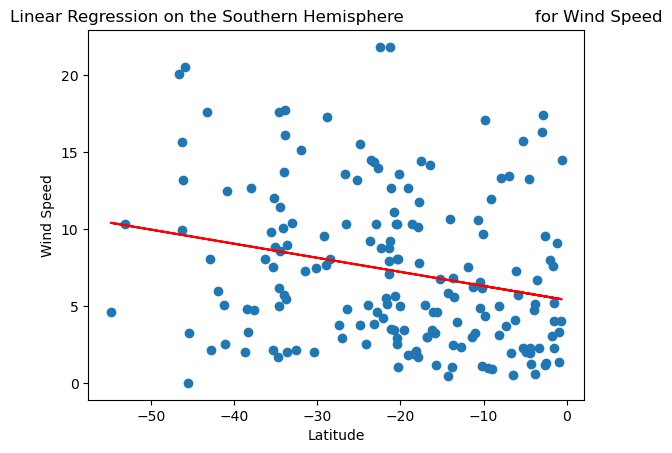

In [177]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))